# 1.4.4 Smoothing Images

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## 2D Convolution (Image Filtering)

In [2]:
img = cv2.imread('opencv_logo.png')
kernel = np.ones((5,5),np.float32)/25

In [3]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

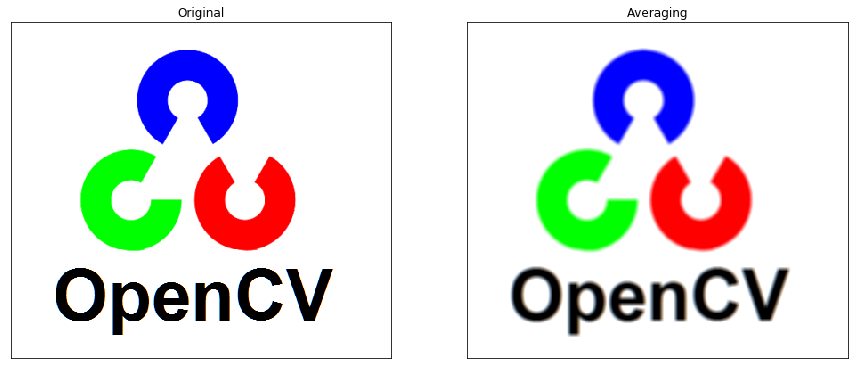

In [4]:
dst = cv2.filter2D(img,-1,kernel)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Blurring (Image Smoothing)

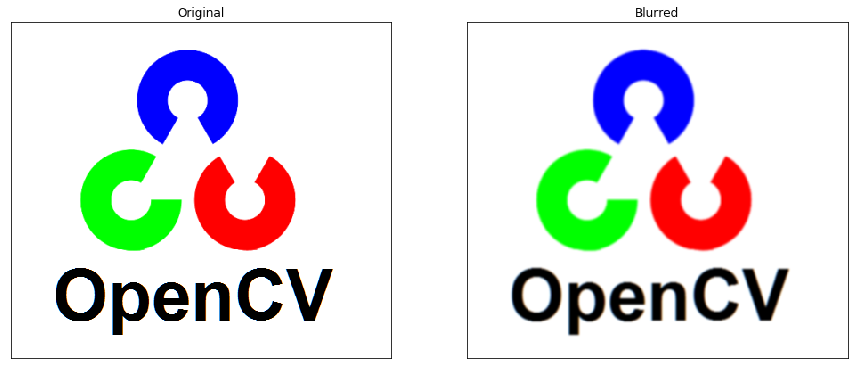

In [5]:
#blur = cv2.blur(img,(5,5))
blur = cv2.GaussianBlur(img,(5,5),0)
#blur = cv2.medianBlur(img,5)
#blur = cv2.bilateralFilter(img,9,75,75)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

## Kernel Convolution

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [7]:
l=1
kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]],np.float32)

In [8]:
kernel

array([[ 0., -1.,  0.],
       [-1.,  4., -1.],
       [ 0., -1.,  0.]], dtype=float32)

In [9]:
img = np.random.randint(10, size=(12,12))
#img = np.ones((10,10),np.float32)

In [10]:
img

array([[5, 9, 7, 4, 2, 7, 3, 0, 2, 2, 7, 4],
       [9, 8, 9, 4, 1, 3, 6, 5, 0, 6, 0, 9],
       [7, 9, 0, 0, 3, 6, 6, 1, 4, 7, 4, 4],
       [4, 2, 0, 4, 1, 2, 3, 9, 6, 0, 2, 8],
       [3, 5, 5, 2, 5, 9, 6, 4, 6, 7, 2, 5],
       [8, 1, 4, 4, 3, 7, 2, 9, 6, 3, 8, 7],
       [5, 4, 3, 7, 7, 6, 6, 6, 3, 5, 3, 6],
       [8, 8, 6, 9, 3, 0, 2, 4, 9, 0, 2, 8],
       [6, 3, 4, 2, 8, 4, 5, 8, 4, 7, 6, 5],
       [6, 3, 3, 0, 0, 0, 9, 0, 7, 6, 1, 1],
       [7, 1, 0, 8, 7, 2, 1, 6, 3, 7, 2, 7],
       [3, 1, 4, 8, 9, 9, 7, 9, 3, 6, 7, 7]])

In [11]:
h,w=img.shape

In [12]:
print(h,w)

12 12


In [13]:
#[*range(-2,3)]

In [14]:
dst = np.zeros((h,w),np.int)

In [15]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i,j]=t        

In [16]:
img

array([[5, 9, 7, 4, 2, 7, 3, 0, 2, 2, 7, 4],
       [9, 8, 9, 4, 1, 3, 6, 5, 0, 6, 0, 9],
       [7, 9, 0, 0, 3, 6, 6, 1, 4, 7, 4, 4],
       [4, 2, 0, 4, 1, 2, 3, 9, 6, 0, 2, 8],
       [3, 5, 5, 2, 5, 9, 6, 4, 6, 7, 2, 5],
       [8, 1, 4, 4, 3, 7, 2, 9, 6, 3, 8, 7],
       [5, 4, 3, 7, 7, 6, 6, 6, 3, 5, 3, 6],
       [8, 8, 6, 9, 3, 0, 2, 4, 9, 0, 2, 8],
       [6, 3, 4, 2, 8, 4, 5, 8, 4, 7, 6, 5],
       [6, 3, 3, 0, 0, 0, 9, 0, 7, 6, 1, 1],
       [7, 1, 0, 8, 7, 2, 1, 6, 3, 7, 2, 7],
       [3, 1, 4, 8, 9, 9, 7, 9, 3, 6, 7, 7]])

In [17]:
dst

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  -4,  17,   2,  -8,  -8,   7,  13, -17,  15, -26,   0],
       [  0,  19, -18, -11,   4,  10,   8, -20,   2,  14,   3,   0],
       [  0, -10, -11,  13, -10, -11, -11,  22,   5, -22,  -6,   0],
       [  0,   9,   9, -10,   5,  16,   6, -14,   1,  17, -14,   0],
       [  0, -17,   3,   0, -11,   8, -20,  18,   3, -14,  17,   0],
       [  0,  -1,  -9,   5,   9,   4,   8,   2, -14,  11,  -9,   0],
       [  0,  11,   0,  18, -12, -15,  -7,  -9,  25, -23,  -9,   0],
       [  0,  -9,   2, -13,  23,   3,  -3,  19, -15,  12,   9,   0],
       [  0,  -1,   5, -13, -15, -15,  30, -30,  15,   2, -11,   0],
       [  0,  -7, -16,  17,   9,  -9, -20,  11, -11,  11, -14,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [18]:
img = cv2.imread('lena.png', 0)

In [19]:
h,w=img.shape

In [20]:
dst = np.zeros((h-2*l,w-2*l),np.uint8)

In [21]:
for i in range(l,h-l):
    for j in range(l,w-l):
        t=0
        for p in range(-l,l+1):
            for q in range(-l,l+1):
                t += kernel[p+l,q+l]*img[i+p,j+q]
        dst[i-l,j-l]=t 

In [22]:
cv2.imshow('img',img)
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()